In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\deepa\OneDrive\Desktop\loan_ap.csv")
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
181,LP001634,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural,N
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y


In [3]:
df.drop("Loan_ID",axis=1,inplace=True)

In [4]:
df.shape

(614, 12)

In [1]:
#Handle missing value

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
l=[]
for i in df.columns:
    l.append([i,df[i].dtype])
l

[['Gender', dtype('O')],
 ['Married', dtype('O')],
 ['Dependents', dtype('O')],
 ['Education', dtype('O')],
 ['Self_Employed', dtype('O')],
 ['ApplicantIncome', dtype('int64')],
 ['CoapplicantIncome', dtype('float64')],
 ['LoanAmount', dtype('float64')],
 ['Loan_Amount_Term', dtype('float64')],
 ['Credit_History', dtype('float64')],
 ['Property_Area', dtype('O')],
 ['Loan_Status', dtype('O')]]

In [11]:
l[6][1]=='int64'

False

In [12]:
numcol=[]
catcol=[]
for i in df.columns:
    if df[i].nunique()<=10:
        catcol.append(i)
    else:
        numcol.append(i)

In [13]:
numcol

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [14]:
catcol

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [15]:
for i in numcol:
    df[i].fillna( df[i].mean(),inplace=True)

In [16]:
for i in catcol:
    df[i].fillna( df[i].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,1.0,Urban,Y
255,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
511,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y
359,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y


In [19]:
#for i in catcol:
#    print(i,":",df[i].unique())

In [20]:
#EDA
#max loan based on gender column 
# count plot barplot
# for numeric data distplot and kde plot, outliears and features scalling

Text(0.5, 1.0, 'Gender vs Loan Status')

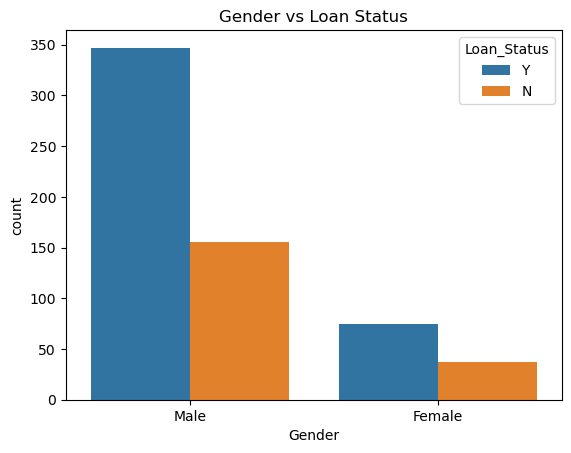

In [21]:
sns.countplot(data=df,x="Gender",hue="Loan_Status")
plt.title("Gender vs Loan Status")

In [22]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

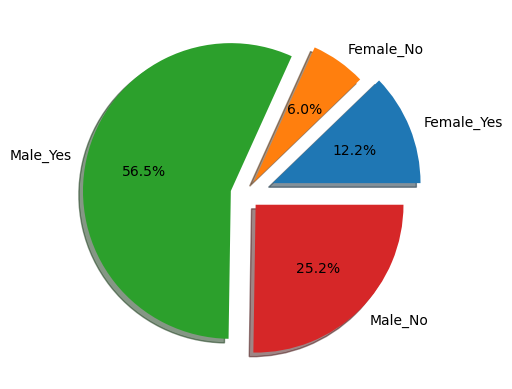

In [23]:
my_explode=[0.2,0.1,0.1,0.1]
label=['Female_Yes','Female_No','Male_Yes','Male_No']

plt.pie(df.groupby('Gender')['Loan_Status'].value_counts(),autopct='%1.1f%%',labels=label,explode=my_explode,shadow=True)
plt.show()

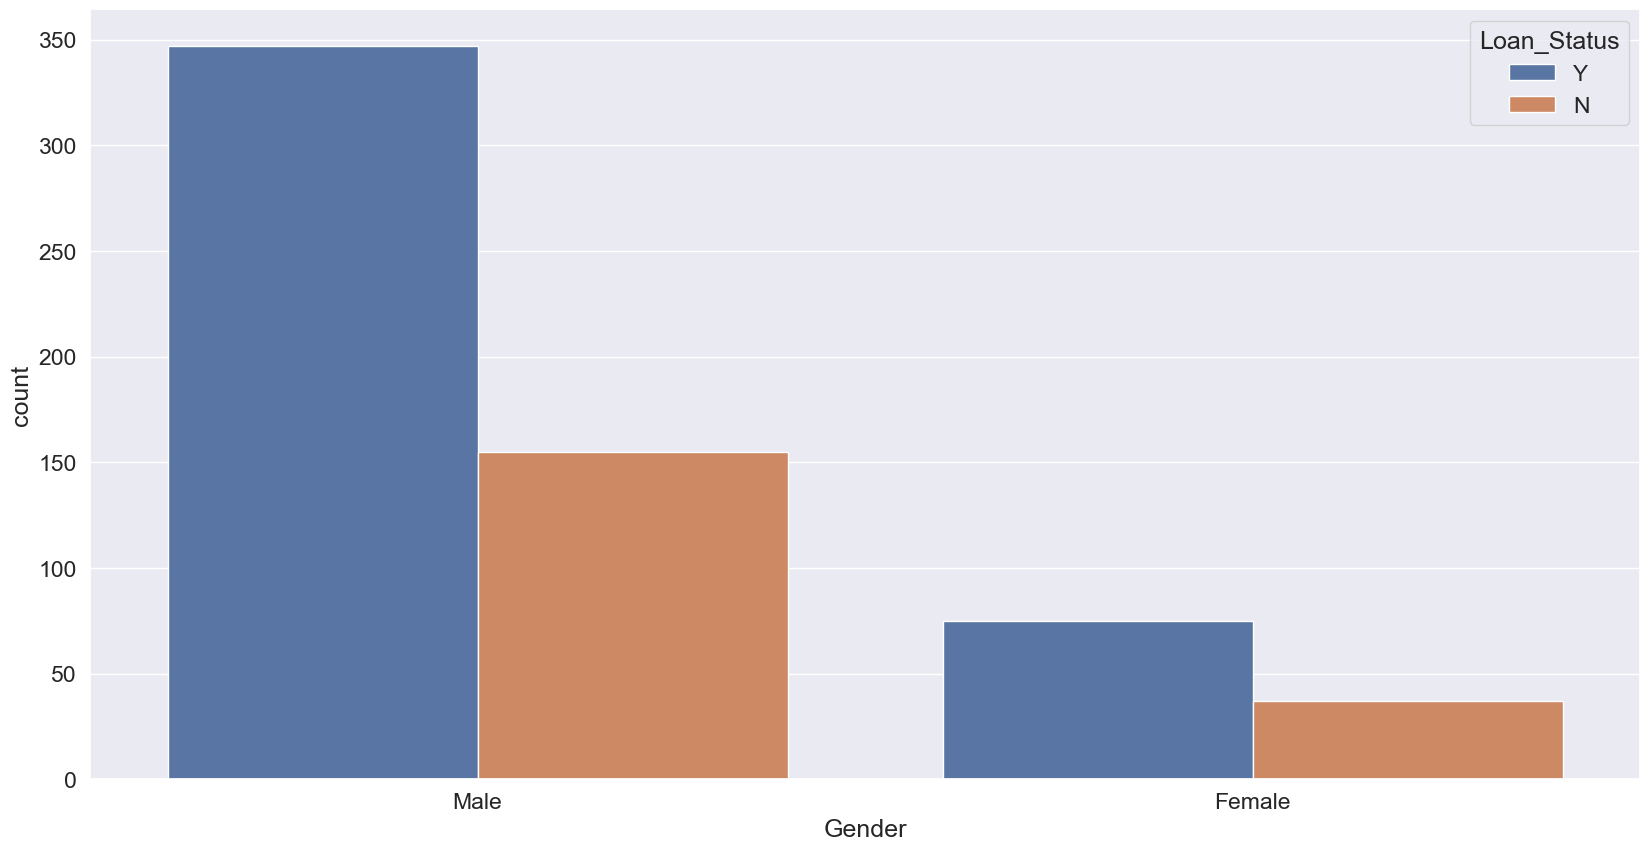

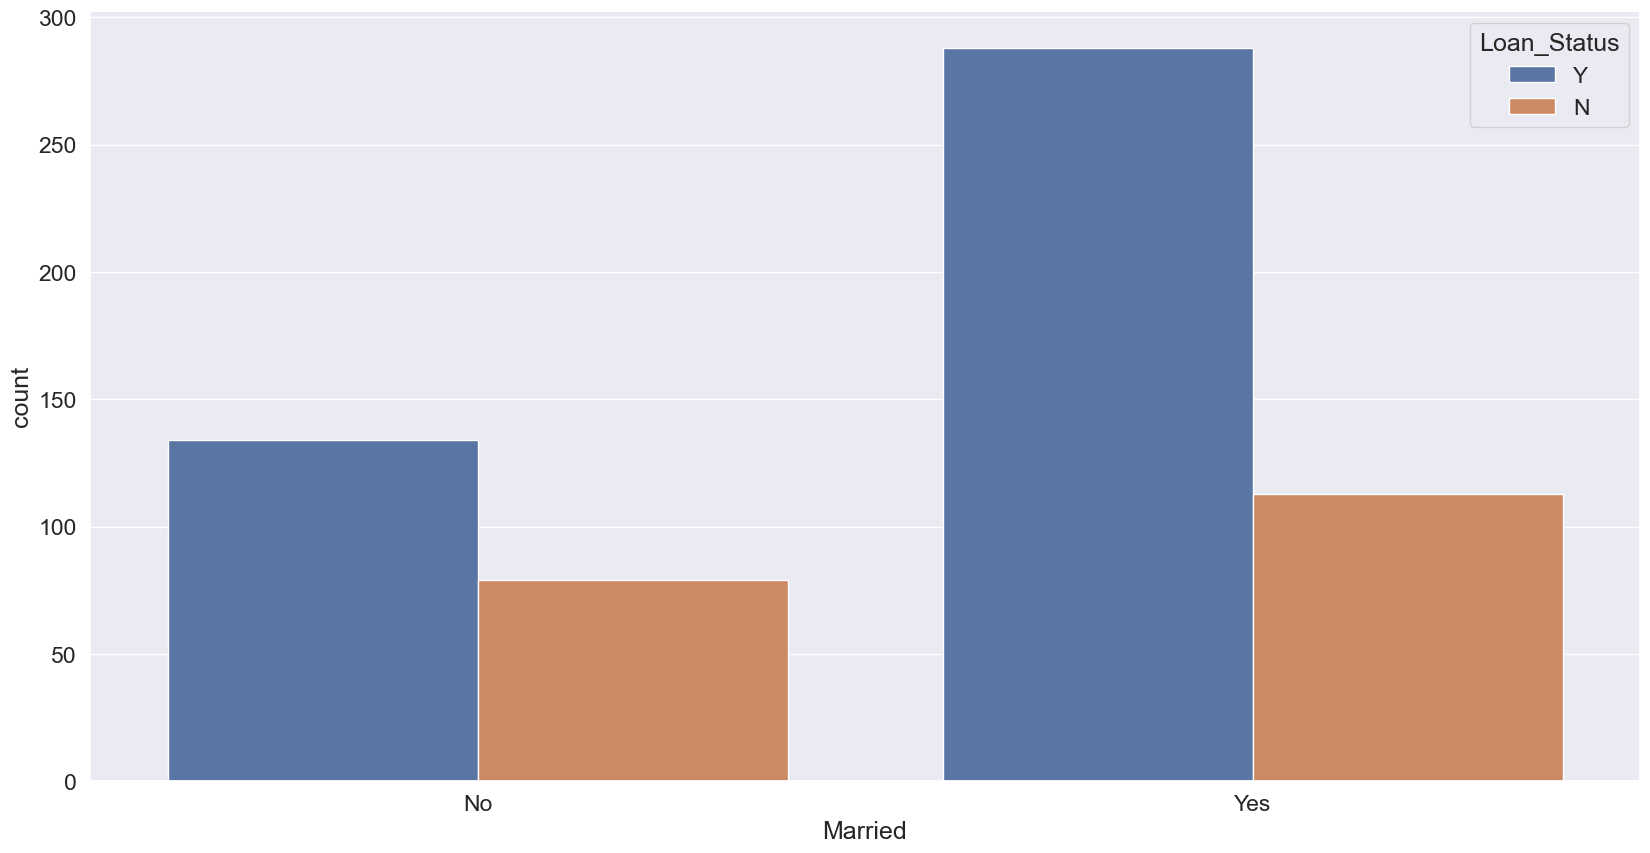

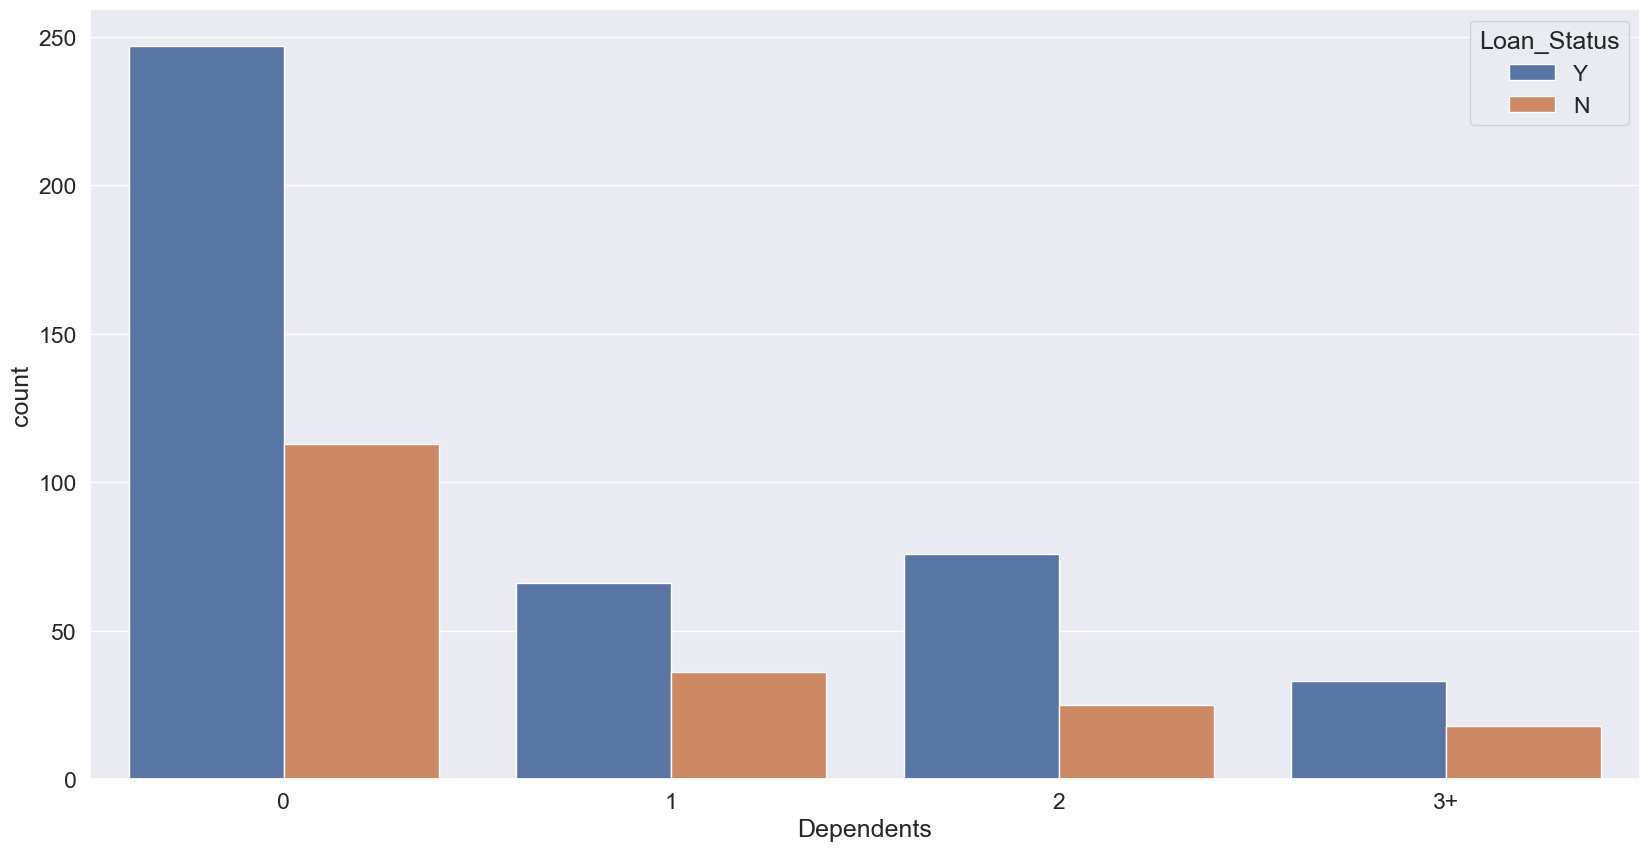

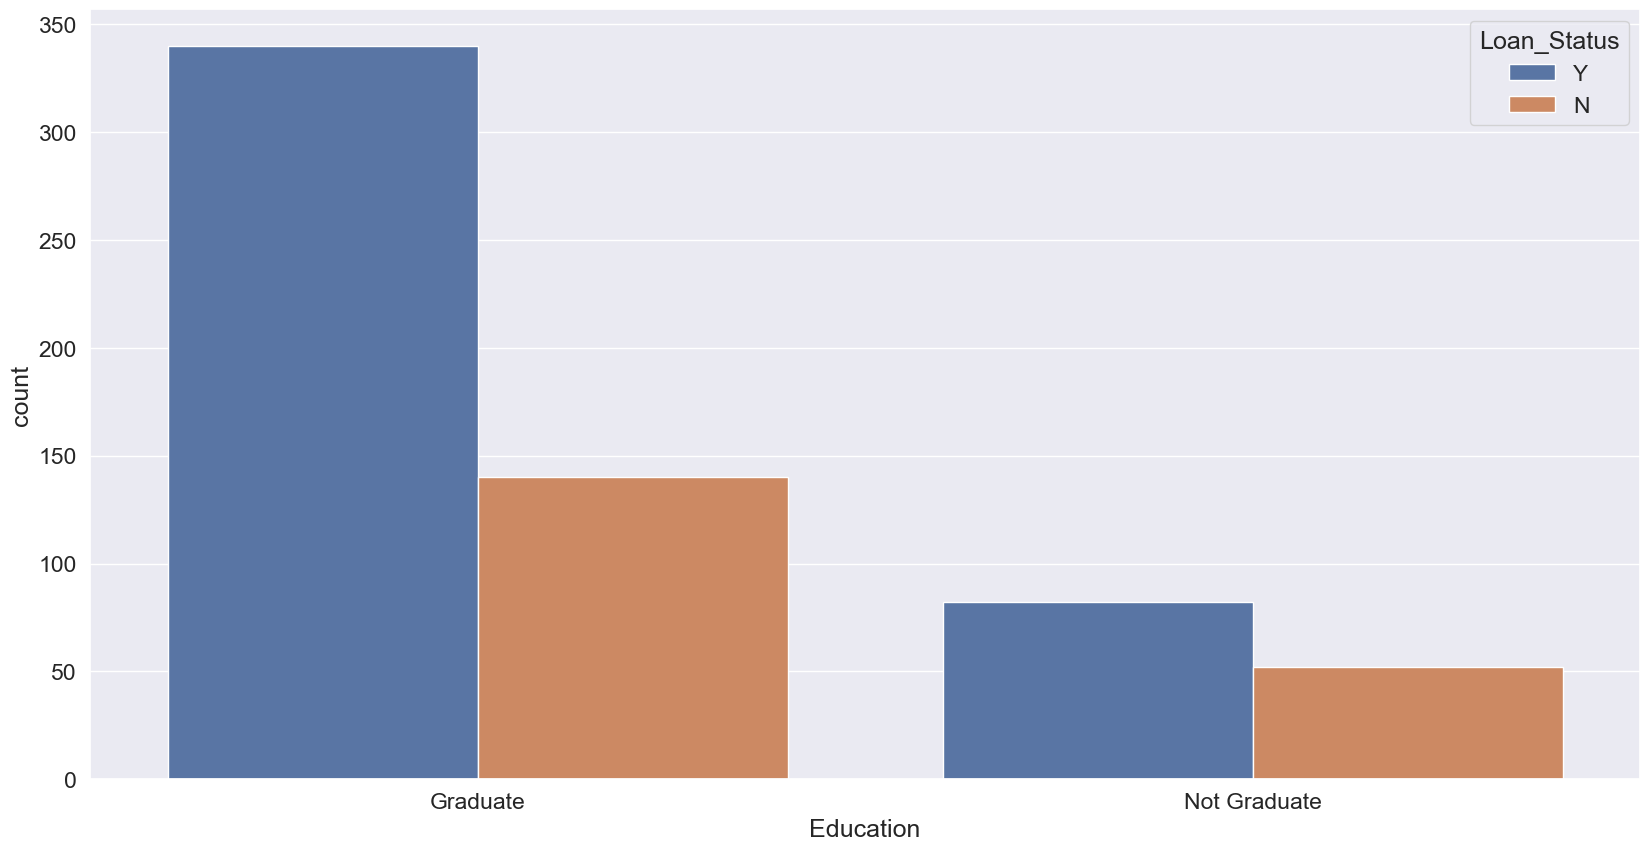

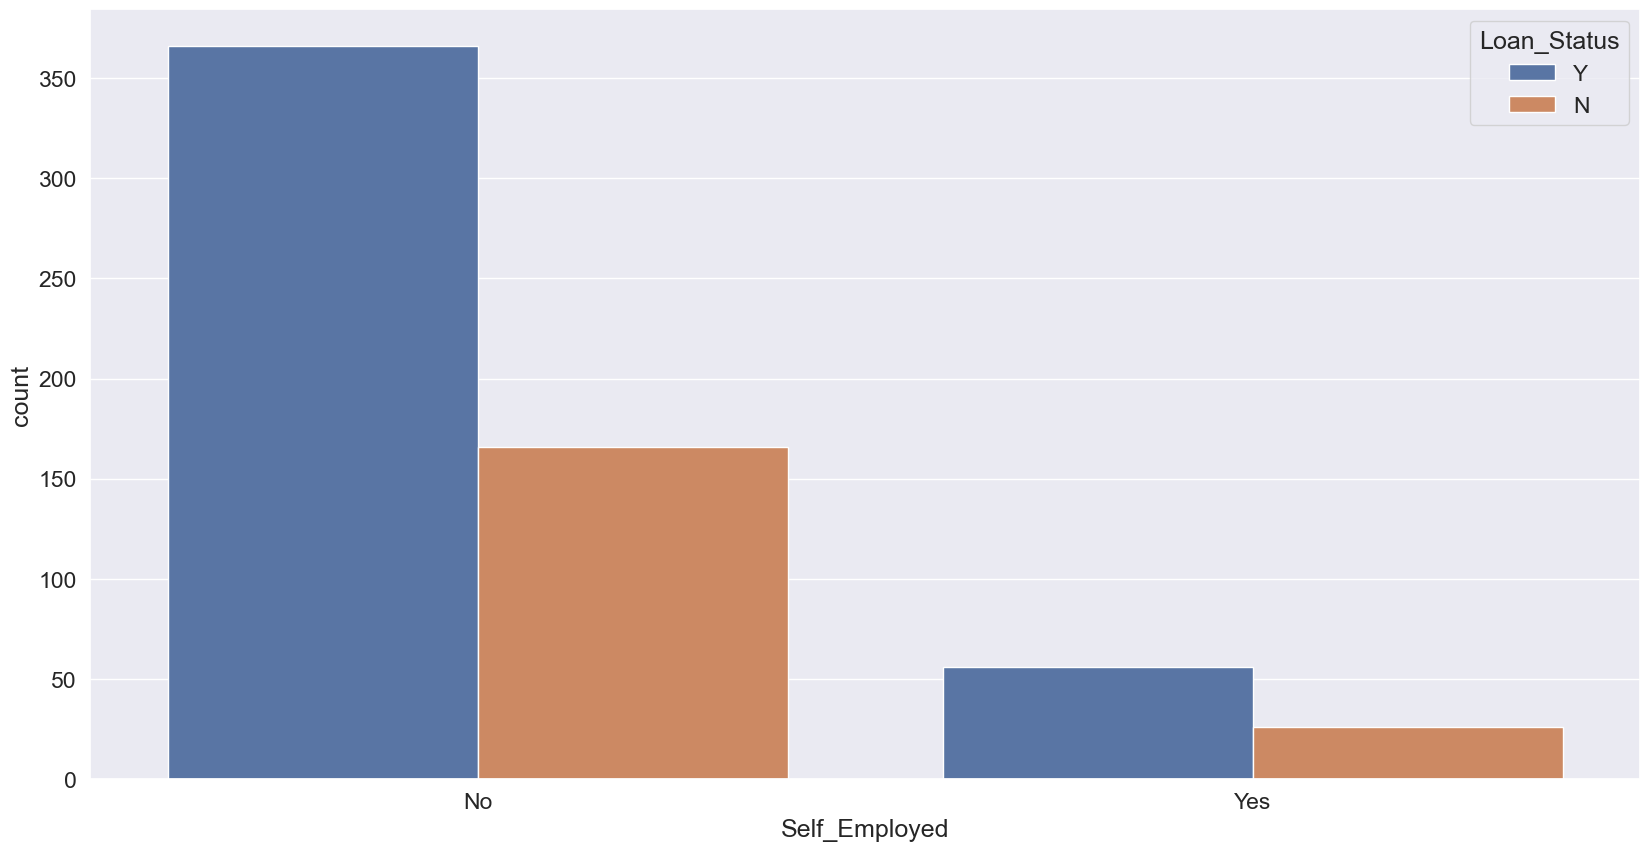

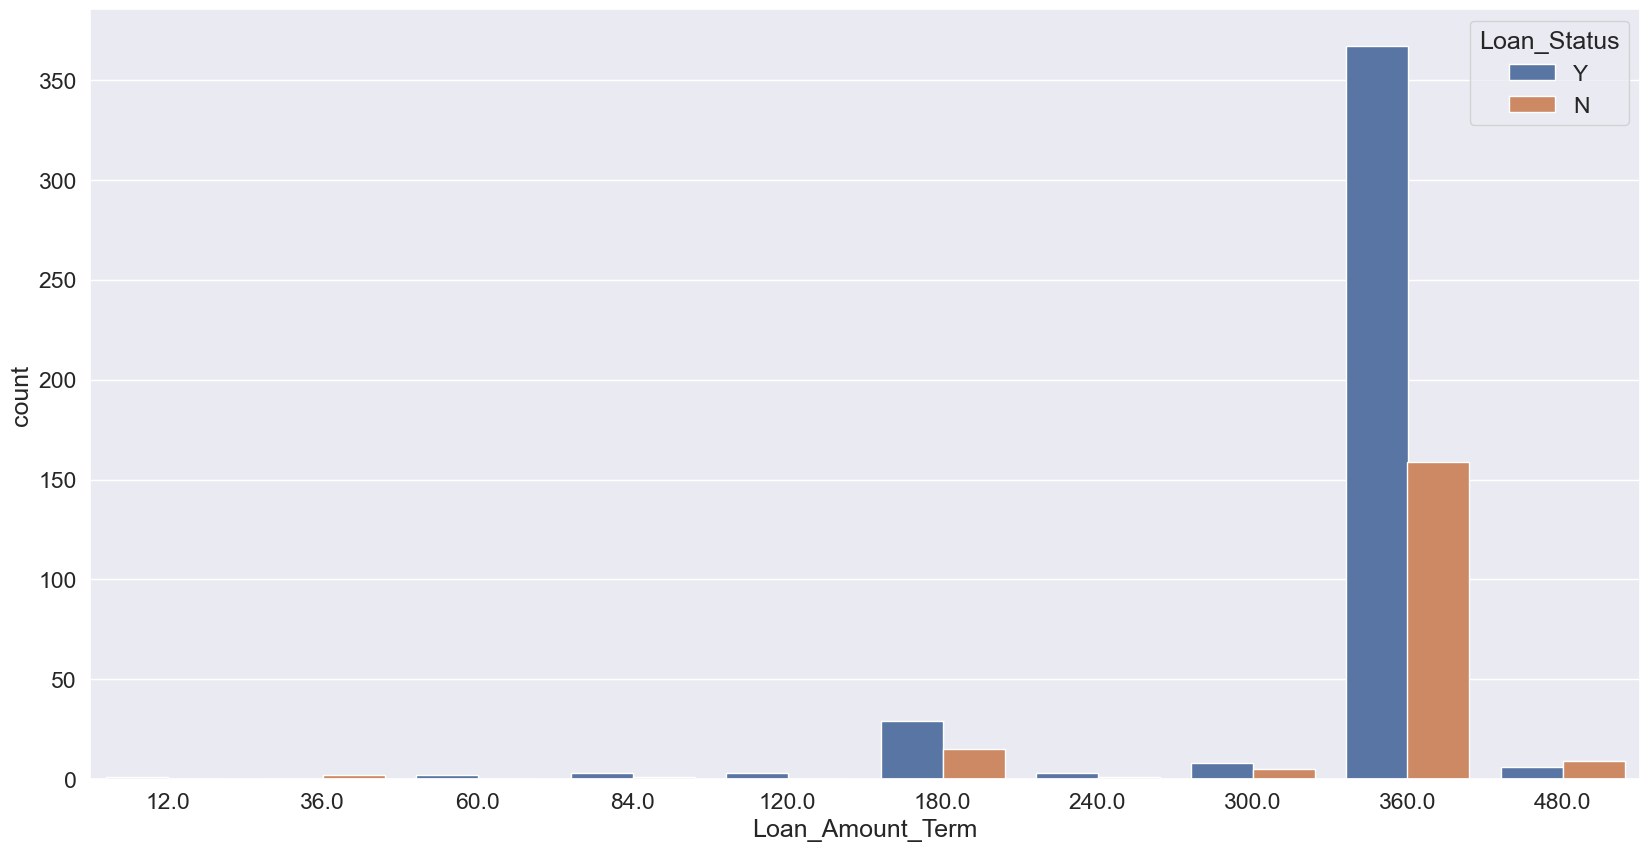

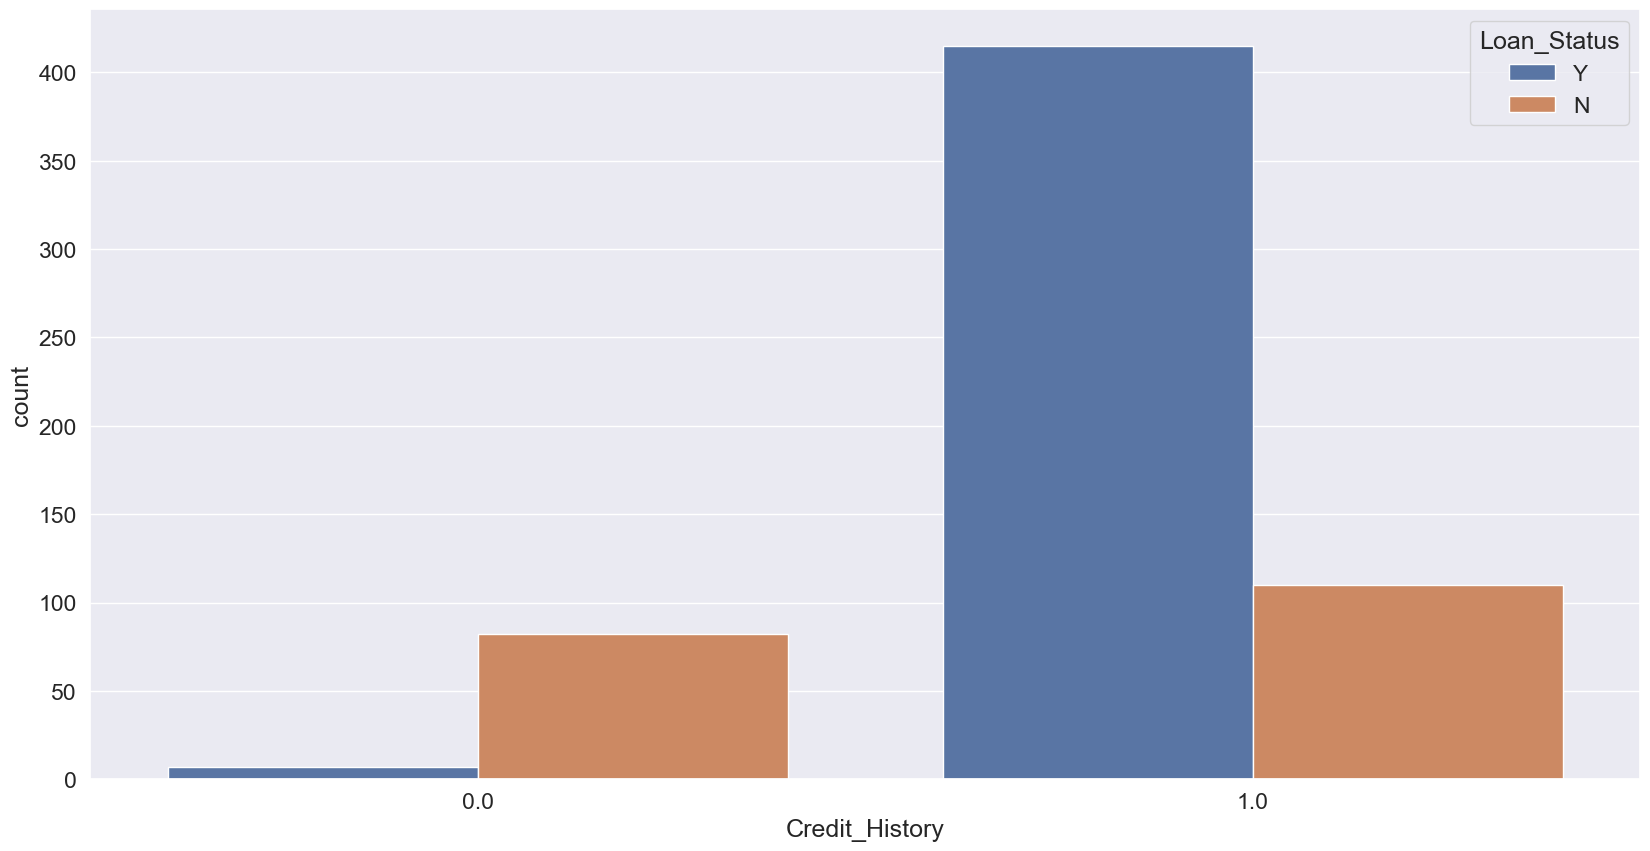

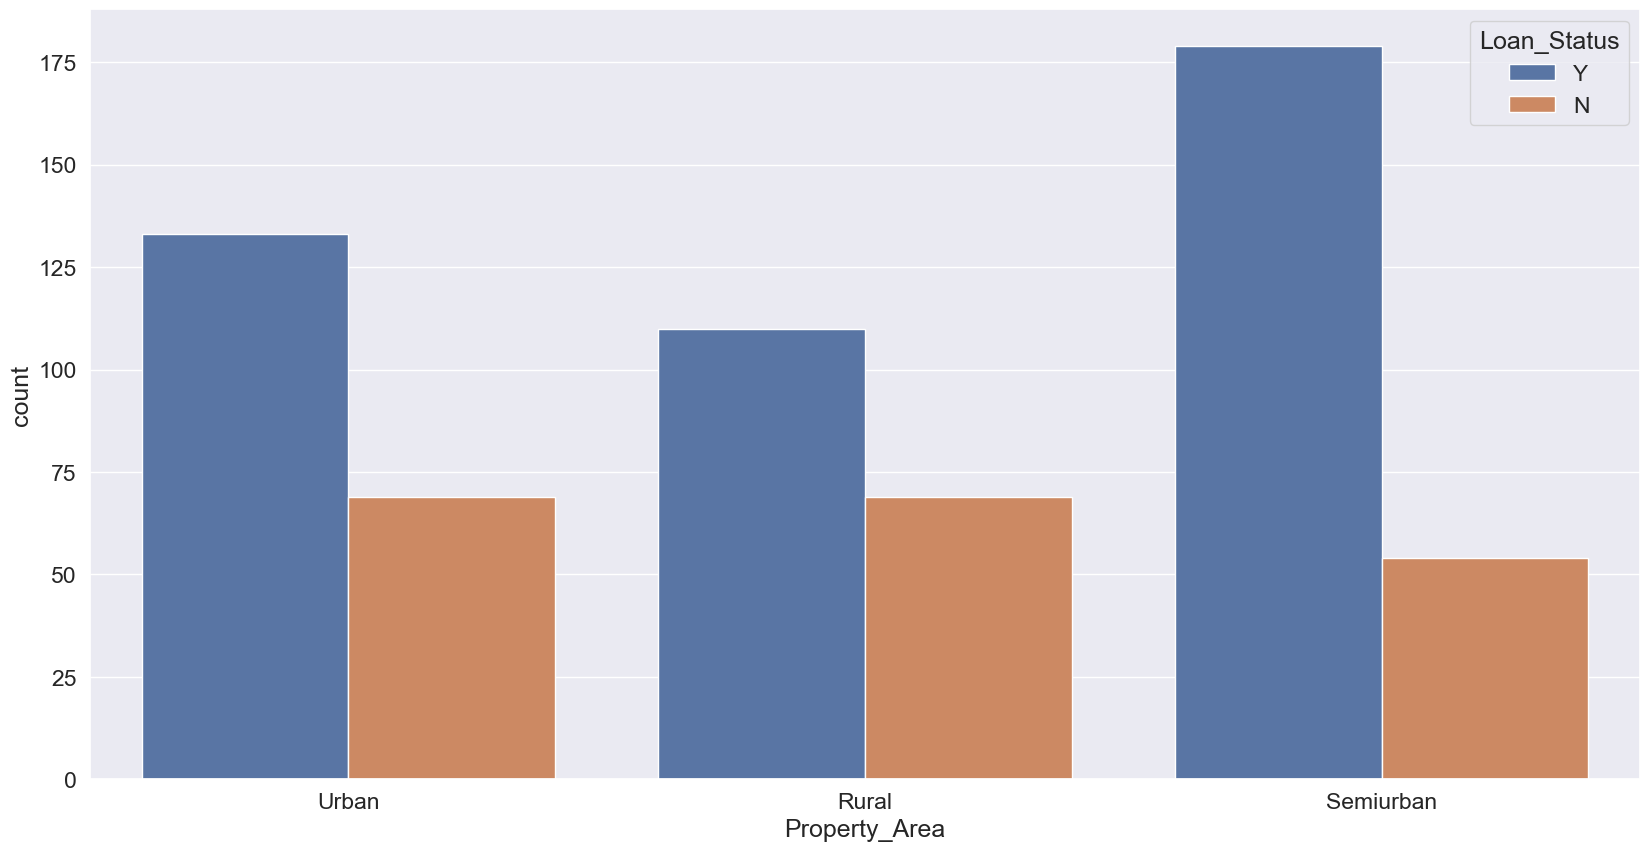

In [24]:
for i in catcol[:-1]:
    plt.figure(figsize=(20,10))
    sns.set(font_scale=1.5)
    plt.subplot()
    sns.countplot(data=df, x=i,hue="Loan_Status")
    plt.show()

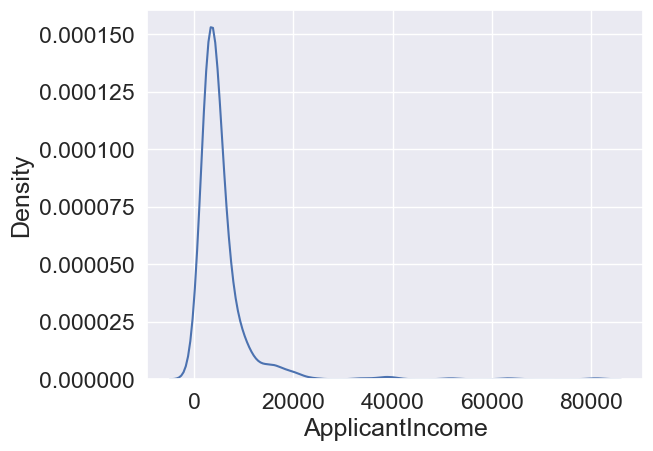

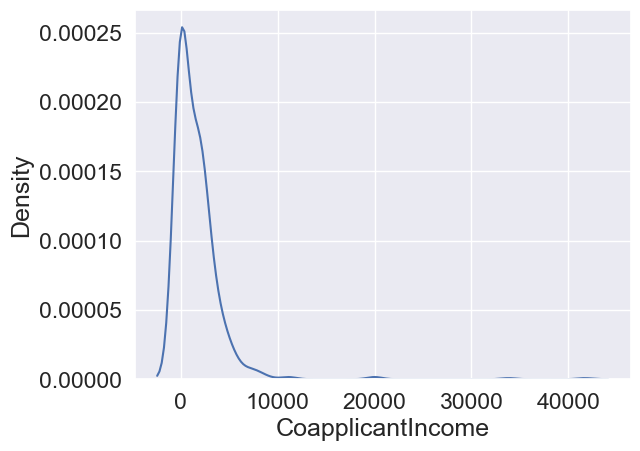

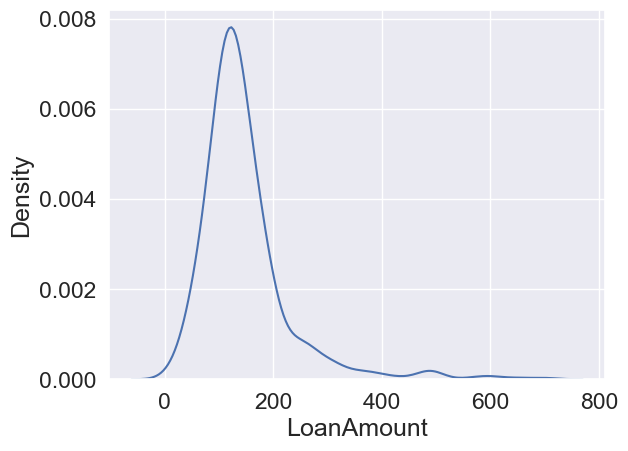

In [25]:
for i in numcol:
    sns.kdeplot(df[i])
    plt.show()

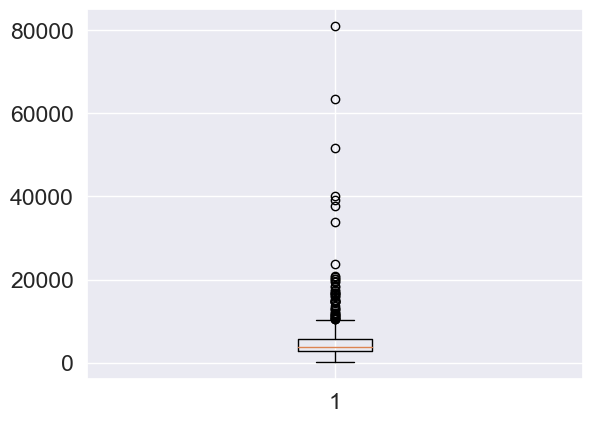

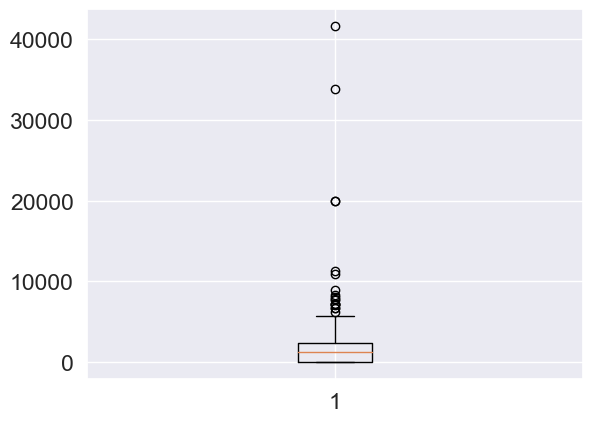

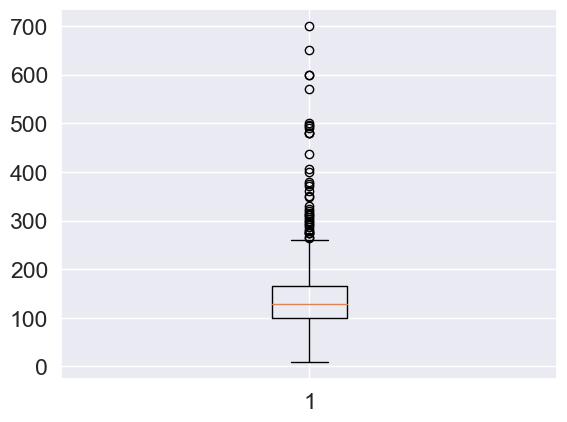

In [26]:
for i in numcol:
    plt.boxplot(df[i])
    plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler  #column ki sbse badi digit k according sb digit ko 0 se 1 tk me define kr dega
scaler=MinMaxScaler()

In [28]:
numcol_scaler=scaler.fit_transform(df[numcol])
numcol_scaler

array([[0.07048856, 0.        , 0.19885986],
       [0.05482993, 0.03619171, 0.17221418],
       [0.03525046, 0.        , 0.08248915],
       ...,
       [0.09798392, 0.00575995, 0.35311143],
       [0.09193568, 0.        , 0.25759768],
       [0.05482993, 0.        , 0.17945007]])

In [29]:
num_df=pd.DataFrame(numcol_scaler,columns=[numcol])
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.070489,0.000000,0.198860
1,0.054830,0.036192,0.172214
2,0.035250,0.000000,0.082489
3,0.030093,0.056592,0.160637
4,0.072356,0.000000,0.191027
...,...,...,...
609,0.034014,0.000000,0.089725
610,0.048930,0.000000,0.044863
611,0.097984,0.005760,0.353111
612,0.091936,0.000000,0.257598


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [32]:
catcol_value=[]
for i in catcol:
    v=le.fit_transform(df[i])
    catcol_value.append(v)
display(catcol_value)

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 

In [33]:
cat_df=pd.DataFrame(catcol_value,index=[catcol]).T
cat_df

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8,1,2,1
1,1,1,1,0,0,8,1,0,0
2,1,1,0,0,1,8,1,2,1
3,1,1,0,1,0,8,1,2,1
4,1,0,0,0,0,8,1,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,8,1,0,1
610,1,1,3,0,0,5,1,0,1
611,1,1,1,0,0,8,1,2,1
612,1,1,2,0,0,8,1,2,1


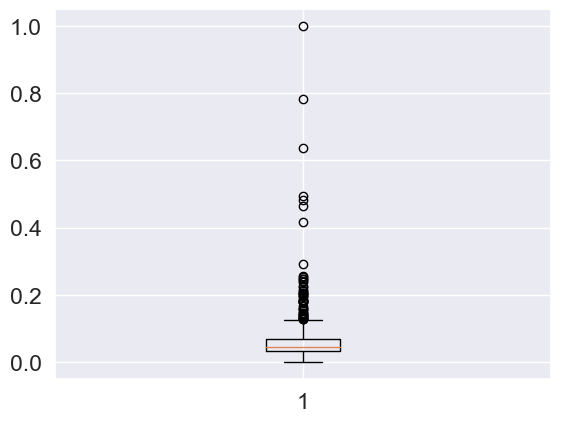

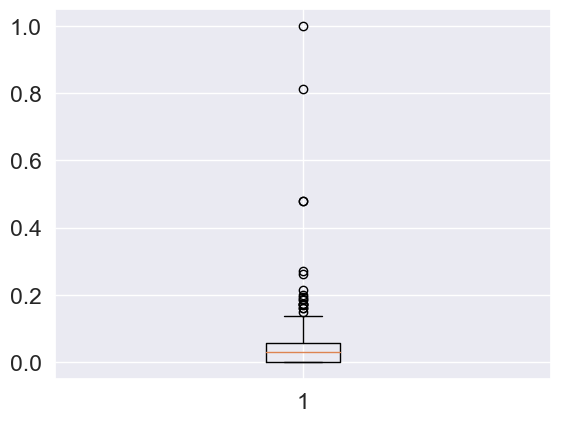

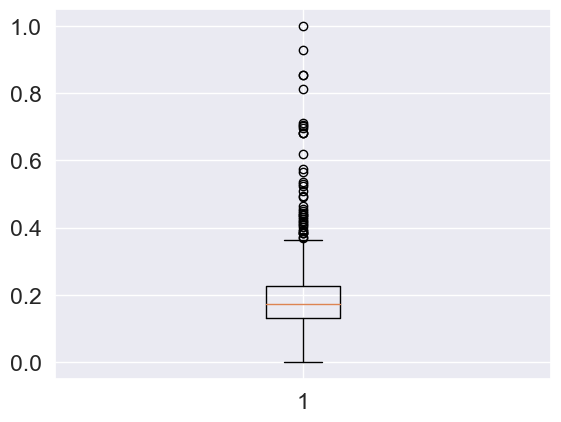

In [34]:
for i in num_df.columns:
    plt.boxplot(num_df[i])
    plt.show()

In [35]:
df1=pd.concat([num_df,cat_df],axis=1)
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.070489,0.000000,0.198860,1,0,0,0,0,8,1,2,1
1,0.054830,0.036192,0.172214,1,1,1,0,0,8,1,0,0
2,0.035250,0.000000,0.082489,1,1,0,0,1,8,1,2,1
3,0.030093,0.056592,0.160637,1,1,0,1,0,8,1,2,1
4,0.072356,0.000000,0.191027,1,0,0,0,0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0,0,0,0,0,8,1,0,1
610,0.048930,0.000000,0.044863,1,1,3,0,0,5,1,0,1
611,0.097984,0.005760,0.353111,1,1,1,0,0,8,1,2,1
612,0.091936,0.000000,0.257598,1,1,2,0,0,8,1,2,1


In [36]:
x=df1.drop('Loan_Status',axis=1)
x

C:\Users\deepa\AppData\Local\Temp\ipykernel_11616\89690051.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x=df1.drop('Loan_Status',axis=1)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,0.070489,0.000000,0.198860,1,0,0,0,0,8,1,2
1,0.054830,0.036192,0.172214,1,1,1,0,0,8,1,0
2,0.035250,0.000000,0.082489,1,1,0,0,1,8,1,2
3,0.030093,0.056592,0.160637,1,1,0,1,0,8,1,2
4,0.072356,0.000000,0.191027,1,0,0,0,0,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0,0,0,0,0,8,1,0
610,0.048930,0.000000,0.044863,1,1,3,0,0,5,1,0
611,0.097984,0.005760,0.353111,1,1,1,0,0,8,1,2
612,0.091936,0.000000,0.257598,1,1,2,0,0,8,1,2


In [37]:
y=df1['Loan_Status']
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=42)

# Logistic Regression Before removing outliers

In [40]:
lr.fit(xtrain,ytrain)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
lr_pred=lr.predict(xtest)
lr_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [42]:
accuracy_score(ytest,lr_pred)

0.7837837837837838

# KNN classifier Before Removing Outliers

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(xtrain,ytrain)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [45]:
knn_pred=knn.predict(xtest)
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [46]:
accuracy_score(ytest,knn_pred)

0.7135135135135136

# Navie bayed Before Removing Outliers

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
NB=GaussianNB()

In [49]:
NB.fit(xtrain,ytrain)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [50]:
b=nb_pred=NB.predict(xtest)
nb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [51]:
accuracy_score(ytest,nb_pred)

0.7783783783783784

# Decision Tree Befor Removing Outliers

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt=DecisionTreeClassifier(criterion="entropy")

In [54]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [55]:
dt_pred=dt.predict(xtest)
dt_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [56]:
accuracy_score(ytest,dt_pred)

0.6972972972972973

# Random Forest Before Removing Outliers

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rc=RandomForestClassifier()

In [59]:
rc.fit(xtrain,ytrain)

C:\Users\deepa\AppData\Local\Temp\ipykernel_11616\3264022091.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rc.fit(xtrain,ytrain)


RandomForestClassifier()

In [60]:
rc_pred=rc.predict(xtest)
rc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [61]:
accuracy_score(ytest,rc_pred)

0.7891891891891892

In [62]:
for i in numcol:
    q25=np.percentile(df[i],25)
    q75=np.percentile(df[i],75)
    iqr=q75-q25
    q0=q25-(iqr*1.5)
    q100=q75+(iqr*1.5)
    a=df[(df[i]>=q0) & (df[i]<=q100)]
    print(a)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [63]:
a=a.reset_index()
a

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
569,610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
570,611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
571,612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [64]:
a['CoapplicantIncome']=a['CoapplicantIncome'].replace(0,0.000000000001)
a

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,1.000000e-12,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1.508000e+03,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,1.000000e-12,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2.358000e+03,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,1.000000e-12,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,609,Female,No,0,Graduate,No,2900,1.000000e-12,71.000000,360.0,1.0,Rural,Y
569,610,Male,Yes,3+,Graduate,No,4106,1.000000e-12,40.000000,180.0,1.0,Rural,Y
570,611,Male,Yes,1,Graduate,No,8072,2.400000e+02,253.000000,360.0,1.0,Urban,Y
571,612,Male,Yes,2,Graduate,No,7583,1.000000e-12,187.000000,360.0,1.0,Urban,Y


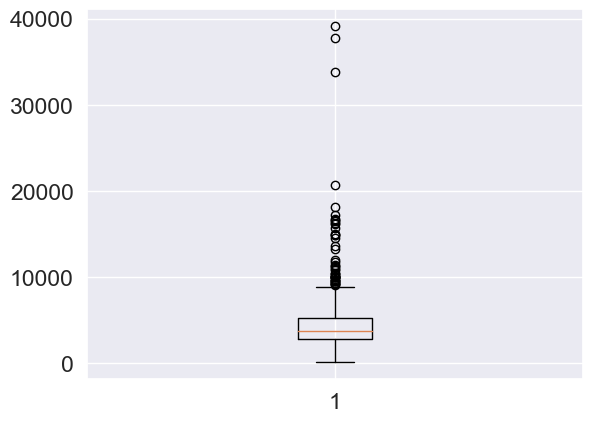

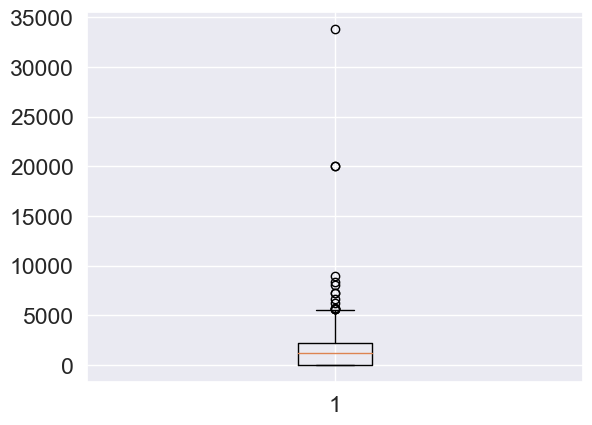

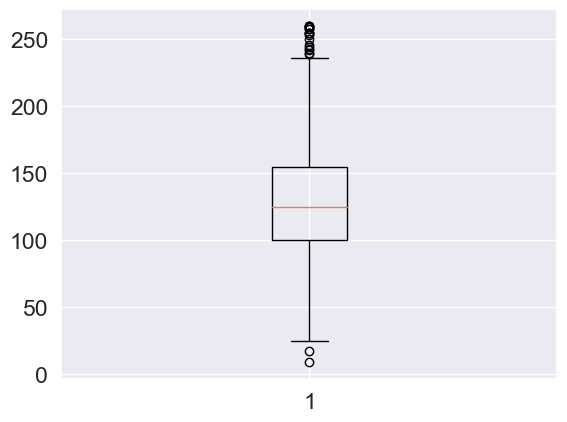

In [65]:
for i in numcol:
    plt.boxplot(a[i])
    plt.show()

In [66]:
 for i in catcol:
        a["label_"+i]=le.fit_transform(a[i])

In [67]:
a

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,label_Gender,label_Married,label_Dependents,label_Education,label_Self_Employed,label_Loan_Amount_Term,label_Credit_History,label_Property_Area,label_Loan_Status
0,0,Male,No,0,Graduate,No,5849,1.000000e-12,146.412162,360.0,...,Y,1,0,0,0,0,8,1,2,1
1,1,Male,Yes,1,Graduate,No,4583,1.508000e+03,128.000000,360.0,...,N,1,1,1,0,0,8,1,0,0
2,2,Male,Yes,0,Graduate,Yes,3000,1.000000e-12,66.000000,360.0,...,Y,1,1,0,0,1,8,1,2,1
3,3,Male,Yes,0,Not Graduate,No,2583,2.358000e+03,120.000000,360.0,...,Y,1,1,0,1,0,8,1,2,1
4,4,Male,No,0,Graduate,No,6000,1.000000e-12,141.000000,360.0,...,Y,1,0,0,0,0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,609,Female,No,0,Graduate,No,2900,1.000000e-12,71.000000,360.0,...,Y,0,0,0,0,0,8,1,0,1
569,610,Male,Yes,3+,Graduate,No,4106,1.000000e-12,40.000000,180.0,...,Y,1,1,3,0,0,5,1,0,1
570,611,Male,Yes,1,Graduate,No,8072,2.400000e+02,253.000000,360.0,...,Y,1,1,1,0,0,8,1,2,1
571,612,Male,Yes,2,Graduate,No,7583,1.000000e-12,187.000000,360.0,...,Y,1,1,2,0,0,8,1,2,1


In [68]:
a=a.drop(catcol,axis=1)

In [69]:
a=a.drop("index",axis=1)
a

,ApplicantIncome,CoapplicantIncome,LoanAmount,label_Gender,label_Married,label_Dependents,label_Education,label_Self_Employed,label_Loan_Amount_Term,label_Credit_History,label_Property_Area,label_Loan_Status
0,5849,1.000000e-12,146.412162,1,0,0,0,0,8,1,2,1
1,4583,1.508000e+03,128.000000,1,1,1,0,0,8,1,0,0
2,3000,1.000000e-12,66.000000,1,1,0,0,1,8,1,2,1
3,2583,2.358000e+03,120.000000,1,1,0,1,0,8,1,2,1
4,6000,1.000000e-12,141.000000,1,0,0,0,0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
568,2900,1.000000e-12,71.000000,0,0,0,0,0,8,1,0,1
569,4106,1.000000e-12,40.000000,1,1,3,0,0,5,1,0,1
570,8072,2.400000e+02,253.000000,1,1,1,0,0,8,1,2,1
571,7583,1.000000e-12,187.000000,1,1,2,0,0,8,1,2,1


In [70]:
for i in numcol:
    a[i]=np.log(a[i])

In [71]:
a

,ApplicantIncome,CoapplicantIncome,LoanAmount,label_Gender,label_Married,label_Dependents,label_Education,label_Self_Employed,label_Loan_Amount_Term,label_Credit_History,label_Property_Area,label_Loan_Status
0,8.674026,-27.631021,4.986426,1,0,0,0,0,8,1,2,1
1,8.430109,7.318540,4.852030,1,1,1,0,0,8,1,0,0
2,8.006368,-27.631021,4.189655,1,1,0,0,1,8,1,2,1
3,7.856707,7.765569,4.787492,1,1,0,1,0,8,1,2,1
4,8.699515,-27.631021,4.948760,1,0,0,0,0,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
568,7.972466,-27.631021,4.262680,0,0,0,0,0,8,1,0,1
569,8.320205,-27.631021,3.688879,1,1,3,0,0,5,1,0,1
570,8.996157,5.480639,5.533389,1,1,1,0,0,8,1,2,1
571,8.933664,-27.631021,5.231109,1,1,2,0,0,8,1,2,1


In [72]:
x1=a.drop("label_Loan_Status",axis=1)
x1

,ApplicantIncome,CoapplicantIncome,LoanAmount,label_Gender,label_Married,label_Dependents,label_Education,label_Self_Employed,label_Loan_Amount_Term,label_Credit_History,label_Property_Area
0,8.674026,-27.631021,4.986426,1,0,0,0,0,8,1,2
1,8.430109,7.318540,4.852030,1,1,1,0,0,8,1,0
2,8.006368,-27.631021,4.189655,1,1,0,0,1,8,1,2
3,7.856707,7.765569,4.787492,1,1,0,1,0,8,1,2
4,8.699515,-27.631021,4.948760,1,0,0,0,0,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
568,7.972466,-27.631021,4.262680,0,0,0,0,0,8,1,0
569,8.320205,-27.631021,3.688879,1,1,3,0,0,5,1,0
570,8.996157,5.480639,5.533389,1,1,1,0,0,8,1,2
571,8.933664,-27.631021,5.231109,1,1,2,0,0,8,1,2


In [73]:
y1=a['label_Loan_Status']
y1

0      1
1      0
2      1
3      1
4      1
      ..
568    1
569    1
570    1
571    1
572    0
Name: label_Loan_Status, Length: 573, dtype: int32

In [74]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,train_size=0.7,random_state=42)

In [75]:
xtrain1

,ApplicantIncome,CoapplicantIncome,LoanAmount,label_Gender,label_Married,label_Dependents,label_Education,label_Self_Employed,label_Loan_Amount_Term,label_Credit_History,label_Property_Area
149,7.529943,6.947937,4.584967,1,1,0,1,0,8,1,1
124,8.148735,-27.631021,3.218876,1,1,0,0,1,4,1,1
429,9.028099,-27.631021,5.075174,1,1,0,0,0,8,1,1
196,9.210340,-27.631021,5.365976,0,0,0,0,0,8,1,1
265,9.936294,-27.631021,4.986426,1,1,0,0,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,6.907755,8.013674,4.700480,1,1,1,0,1,8,1,2
106,8.916104,-27.631021,4.986426,0,0,1,0,1,8,1,1
270,9.159889,-27.631021,5.231109,1,0,0,0,0,8,1,0
435,8.699515,-27.631021,4.941642,1,0,0,0,0,8,1,0


# Logistic Regression After Removing Outliers

In [76]:
lr1=LogisticRegression()

In [77]:
lr1.fit(xtrain1,ytrain1)

C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
lr1_pred=lr1.predict(xtest1)
lr1_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [79]:
accuracy_score(ytest1,lr1_pred)

0.8313953488372093

# KNN Classifier After Removing Outliers

In [80]:
knn1=KNeighborsClassifier(n_neighbors=5)

In [81]:
knn1.fit(xtrain1,ytrain1)

KNeighborsClassifier()

In [82]:
knn1_pred=knn1.predict(xtest1)

In [83]:
accuracy_score(ytest1,knn1_pred)

0.7325581395348837

# Naive Bayes After Removing Outliers

In [84]:
nb1=GaussianNB()

In [85]:
nb1.fit(xtrain1,ytrain1)

GaussianNB()

In [86]:
nb1_pred=nb1.predict(xtest1)

In [87]:
accuracy_score(ytest1,nb1_pred)

0.8313953488372093

# Decision Tree After Removing Outliers

In [88]:
dt1=DecisionTreeClassifier(criterion="entropy")

In [89]:
dt1.fit(xtrain1,ytrain1)

DecisionTreeClassifier(criterion='entropy')

In [90]:
dt1_pred=dt1.predict(xtest1)

In [91]:
accuracy_score(ytest1,dt1_pred)

0.6976744186046512

# Random Forest After Removing Outliers

In [92]:
rc1=RandomForestClassifier(n_estimators=1000)

In [93]:
rc1.fit(xtrain1,ytrain1)

RandomForestClassifier(n_estimators=1000)

In [94]:
rc1_pred=rc1.predict(xtest1)

In [95]:
accuracy_score(ytest1,rc1_pred)

0.813953488372093

In [96]:
accuracy_comp=pd.DataFrame({"Before Outliers":[accuracy_score(ytest,lr_pred),accuracy_score(ytest,knn_pred),accuracy_score(ytest,nb_pred),accuracy_score(ytest,dt_pred),accuracy_score(ytest,rc_pred)],
                           "After Outlier":[accuracy_score(ytest1,lr1_pred),accuracy_score(ytest1,knn1_pred),accuracy_score(ytest1,nb1_pred),accuracy_score(ytest1,dt1_pred),accuracy_score(ytest1,rc1_pred)]},
                          index="Logistic_Regression KNN_Classifier Naive_Bayes Decison_Tree Random_Forest".split())

In [97]:
accuracy_comp

,Before Outliers,After Outlier
Logistic_Regression,0.783784,0.831395
KNN_Classifier,0.713514,0.732558
Naive_Bayes,0.778378,0.831395
Decison_Tree,0.697297,0.697674
Random_Forest,0.789189,0.813953


C:\Users\deepa\AppData\Local\Temp\ipykernel_11616\856186815.py:1: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(accuracy_comp,markers="o",markersize=15)


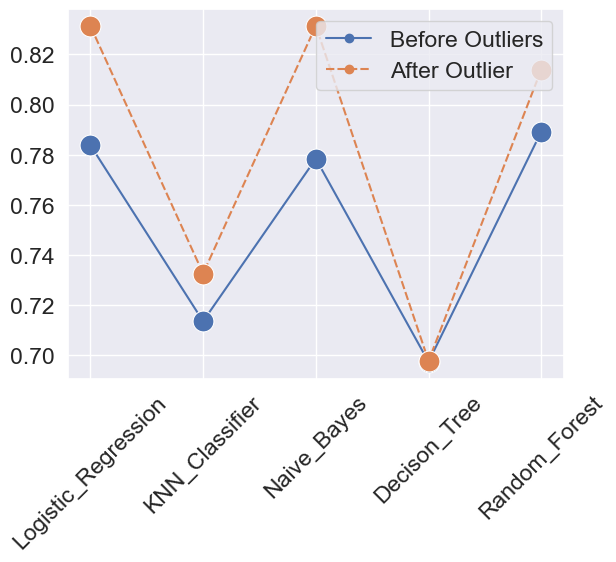

In [98]:
sns.lineplot(accuracy_comp,markers="o",markersize=15)
plt.xticks(rotation=45)
plt.show()